**Clustering Heart Disease Patients for Improved Treatments**

This analysis aims to explore the usefulness of unsupervised clustering algorithms in assisting doctors to understand which treatments might be effective for their patients. The dataset used in this analysis consists of anonymised information from patients diagnosed with heart disease. By clustering patients with similar characteristics, we can identify groups that are likely to respond similarly to specific treatments.

The data is from Kaggle, you can find the data here: https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset?resource=download

There are 3 steps to this analysis:
1. Exploratory Data Analysis
2. K-means Clustering
3. Hierarchical Clustering

***Section 1: Exploratory Data Analysis**

Prior to conducting any analysis, the first step will be Exploratory Data Analysis (EDA) to gain an understanding of the data's structure and characteristics. In the context of this analysis, I will examine the data to ensure that it meets the requirements of the clustering algorithms I plan to employ. Specifically, I will verify that all the variables in the dataset are of numeric type, as the clustering algorithms I will use require numeric data. This preliminary check will help to confirm that the data is suitable for further analysis and clustering procedures.

In [1]:
import pandas as pd

# Load the data
hd = pd.read_csv(r'C:\Users\ellis\OneDrive\Documents\Data\Heart Disease\heart.csv')

# Print the first ten rows
hd.head(11)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
6,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
7,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0
8,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
9,54,1,0,122,286,0,0,116,1,3.2,1,2,2,0


Exploratory Data Analysis (EDA) is crucial for assessing variables and making informed decisions about data scaling. In this clustering analysis, we will utilise k-means and hierarchical clustering algorithms, which rely on distance measures to determine data similarity. Variables with larger scales and greater differences between points may receive more emphasis in these algorithms.

EDA provides insights into variable distribution and scaling, helping us determine the need for appropriate data scaling. Scaling ensures equal treatment of variables in clustering, regardless of their original scales, reducing bias introduced by variables with larger magnitudes.

EDA is vital for understanding the characteristics of the patients in the dataset. By conducting EDA, valuable insights can be gained regarding the value ranges of variables and their distributions. This understanding is especially relevant when evaluating the clusters generated by the clustering algorithms. During the EDA process, it is essential to address questions such as the distribution of patients across different genders. Additionally, identifying potential outliers and understanding their characteristics is important in interpreting the data accurately.

****Should the data be scaled?****

In [2]:
#Evidence that it should be scaled
hd.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Scaling the data is important in this case due to the varying scales and magnitudes of the variables.

Age: Ranges from 52 to 70.
Trestbps (resting blood pressure): Ranges from 125 to 148
Chol (serum cholesterol level): Ranges from 174 to 294
Thalach (maximum heart rate achieved): Ranges from 106 to 168
Oldpeak (ST depression induced by exercise relative to rest): Ranges from 0.0 to 3.1

The above variables have different ranges and magnitudes. Variables with larger scales and magnitudes may have a greater influence on the overall clustering results.

Scaling the data helps to bring all the variables to a similar scale, making them comparable and ensuring that no variable dominates the clustering process solely based on its larger scale. It helps in removing the bias introduced by variables with larger magnitudes, allowing all variables to contribute equally to the clustering algorithm.

Therefore, scaling the data in this case would be beneficial to ensure fair and accurate clustering results.

In [3]:
# Scaling data and saving as a data frame
scaled_hd = pd.DataFrame(hd.apply(lambda x: (x - x.mean()) / x.std()))

# View the scaled data
print(scaled_hd.describe())

                age           sex            cp      trestbps          chol  \
count  1.025000e+03  1.025000e+03  1.025000e+03  1.025000e+03  1.025000e+03   
mean  -3.188777e-16  1.351764e-16  8.318549e-17 -7.140088e-16 -1.039819e-17   
std    1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00   
min   -2.803498e+00 -1.510969e+00 -9.153086e-01 -2.147189e+00 -2.325919e+00   
25%   -7.092086e-01 -1.510969e+00 -9.153086e-01 -6.628929e-01 -6.783930e-01   
50%    1.725974e-01  6.611813e-01  5.590394e-02 -9.200966e-02 -1.162960e-01   
75%    7.237261e-01  6.611813e-01  1.027116e+00  4.788735e-01  5.620971e-01   
max    2.487338e+00  6.611813e-01  1.998329e+00  3.904173e+00  6.163685e+00   

                fbs       restecg       thalach         exang       oldpeak  \
count  1.025000e+03  1.025000e+03  1.025000e+03  1.025000e+03  1.025000e+03   
mean  -1.039819e-17 -2.079637e-17 -4.367238e-16 -1.655045e-16 -2.270271e-16   
std    1.000000e+00  1.000000e+00  1.000000e+00  1.

***Section 2: K-means Clustering***
****First round of k-means****

With the data scaled, the clustering process can now start. In the case of the k-means algorithm, it is necessary to preselect the number of clusters.

To ensure the reproducibility of our statistical analysis, it is important to establish a seed value. Setting a seed in the context of statistical analysis means specifying a fixed starting point for the random number generator. This ensures that when others run our code on the same dataset, they obtain identical results. Setting a seed is necessary to achieve reproducibility.

Reproducibility holds significant value, particularly in the context of providing treatment to patients by doctors. It enables other analysts to understand the origins of the identified groups and validate the obtained results, promoting transparency and reliability in the analysis process.

In [4]:
import random
import os
import numpy as np
from sklearn.cluster import KMeans
from scipy.cluster.vq import kmeans, vq

# Set the random seed value
seed_val = 10

# Set the number of initialisation attempts
n_init = 10

# Set the environment variable to address the memory leak issue
os.environ['OMP_NUM_THREADS'] = '5'

# Perform k-means
kmeans_1 = KMeans(n_clusters=5, random_state=seed_val, n_init=n_init)
kmeans_1.fit(scaled_hd)
labels_1 = kmeans_1.fit_predict(scaled_hd)

# Calculate cluster sizes
cluster_sizes = np.bincount(labels_1)

# Print the cluster labels and sizes
for label, size in enumerate(cluster_sizes):
    print(f"Cluster Label: {label}, Size: {size}")

C:\Users\ellis\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(
C:\Users\ellis\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


Cluster Label: 0, Size: 186
Cluster Label: 1, Size: 192
Cluster Label: 2, Size: 248
Cluster Label: 3, Size: 265
Cluster Label: 4, Size: 134


****Second round of k-means****

In the context of the k-means algorithm, different iterations can lead to different cluster assignments due to the initial random selection of cluster centers. However, if the algorithm consistently groups similar observations together and the clusters are robust, the cluster assignments should remain relatively stable across different iterations.

In the case of the heart disease data, this means that even when the algorithm is initialised with different random points, the same patients should be grouped together if they exhibit similar characteristics. If patients are consistently assigned to different clusters in different runs of the algorithm, it suggests that the clustering method may not effectively capture meaningful relationships among the patients.

To explore the consistency of patient grouping, we will perform another iteration of the k-means algorithm and compare the resulting clusters with the previous runs. This analysis will provide insights into the stability of the clustering outcomes and help evaluate the reliability of the clustering method.

In [5]:
# Set the seed to a different value: 30
seed_val_2 = 30

# Set the number of initialisation attempts
n_init_2 = 10

# Set the environment variable to address the memory leak issue
os.environ['OMP_NUM_THREADS'] = '5'

# Perform k-means
kmeans_2 = KMeans(n_clusters=5, random_state=seed_val_2, n_init=n_init_2)
kmeans_2.fit(scaled_hd)
labels_2 = kmeans_2.fit_predict(scaled_hd)

# Calculate cluster sizes
cluster_sizes_2 = np.bincount(labels_2)

# Print the cluster labels and sizes
for label, size in enumerate(cluster_sizes_2):
    print(f"Cluster Label: {label}, Size: {size}")
    
# Compare cluster labels from the two runs
non_matching_labels = np.sum(labels_1 != labels_2)

# Print the number of non-matching cluster labels
print("Number of non-matching cluster labels:", non_matching_labels)

C:\Users\ellis\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(
C:\Users\ellis\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


Cluster Label: 0, Size: 193
Cluster Label: 1, Size: 125
Cluster Label: 2, Size: 198
Cluster Label: 3, Size: 240
Cluster Label: 4, Size: 269
Number of non-matching cluster labels: 609


It appears that the clusters are quite different sizes. 

It is important that the clusters are stable. Even though the algorithm begins by randomly initialising the cluster centers, if the k-means algorithm is the right choice for the data, then different initialisations of the algorithm will result in similar clusters.

To assess the stability of the clusters obtained from the k-means algorithm, visualisations can be used to compare the cluster assignments between different iterations of the algorithm. By examining the consistency of cluster assignments across multiple runs, insights into the stability of the clusters can be found and patient characteristics that contribute to the grouping can be identified.

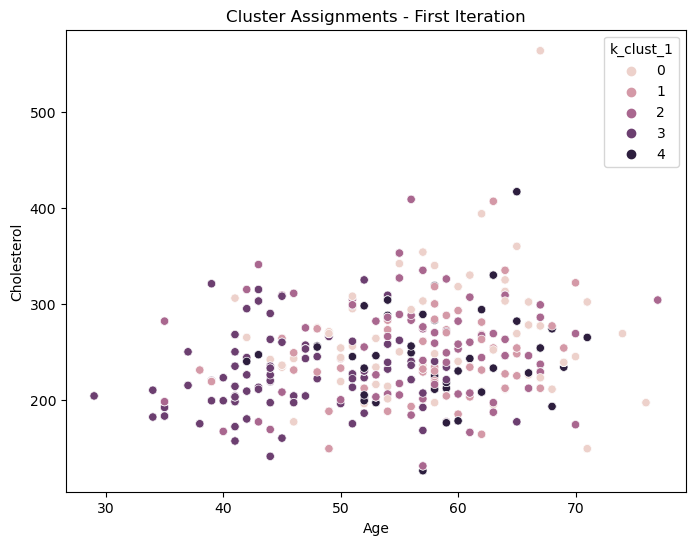

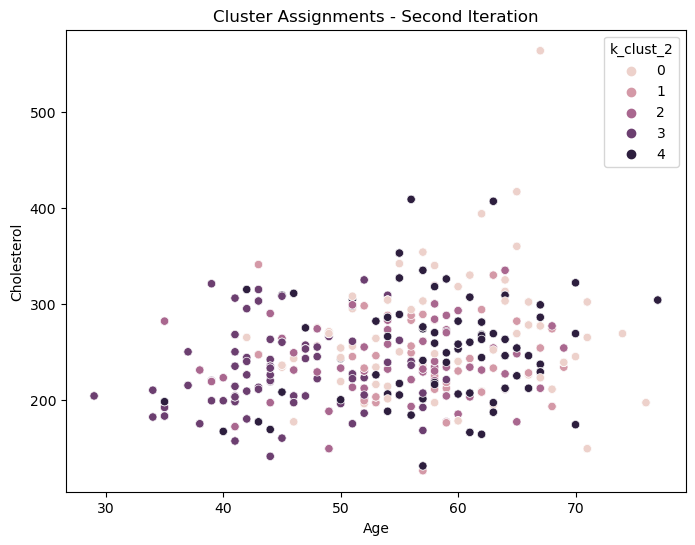

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Add cluster assignments to the data
hd["k_clust_1"] = labels_1
hd["k_clust_2"] = labels_2

# Create and print the scatter plot of age and chol for the first iteration
plt.figure(figsize=(8, 6))
sns.scatterplot(data=hd, x="age", y="chol", hue="k_clust_1")
plt.title("Cluster Assignments - First Iteration")
plt.xlabel("Age")
plt.ylabel("Cholesterol")
plt.show()

# Create and print the scatter plot of age and chol for the second iteration
plt.figure(figsize=(8, 6))
sns.scatterplot(data=hd, x="age", y="chol", hue="k_clust_2")
plt.title("Cluster Assignments - Second Iteration")
plt.xlabel("Age")
plt.ylabel("Cholesterol")
plt.show()

****Assessing the k-means algorithm:****

For the k-means algorithm, similar clusters must be produced for each iteration of the algorithm to make sure that the algorithm clusters the signal, not the noise. It is important the k-mean algorithm seems stable when running multiple iterations. Due to this, I am going to rule out the k-means algorithm as a way to produce groups of heart disease patients as it does not meet this criteria.


***Section 3: Hierarchical Clustering***

Hierarchical clustering is an alternative method to k-means clustering that works well for data with a nested structure. Heart disease data may have this structure. It does not require preselecting the number of clusters.

The dendrogram is a visual representation that helps in selecting clusters. It displays the similarity between observations and assists in determining the appropriate number of clusters for grouping the data. Hierarchical clustering will be used to examine how the data is grouped and gain insights into the structure of the patient data.


In hierarchical clustering, different linkage methods are used to measure the dissimilarity between clusters of observations. Two commonly used linkage methods are complete linkage and single linkage:

- Complete linkage measures the dissimilarity between clusters by considering the largest dissimilarity between any two points in the two clusters being compared.
- Single linkage, on the other hand, measures the dissimilarity between clusters based on the smallest dissimilarity between any two points in the clusters.

Different linkages will result in different clusters being formed.

****Hierarchical Clustering Round One - Complete linkage****

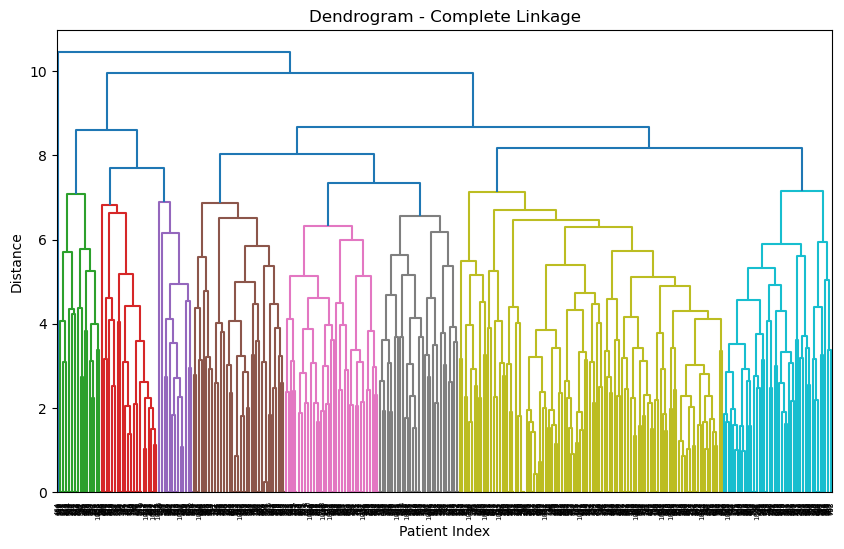

In [7]:
import scipy.cluster.hierarchy as sch

# Hierarchical clustering with complete linkage
hier_clust_1 = sch.linkage(scaled_hd, method='complete')

# Plot the dendrogram
plt.figure(figsize=(10, 6))
sch.dendrogram(hier_clust_1)
plt.xlabel('Patient Index')
plt.ylabel('Distance')
plt.title('Dendrogram - Complete Linkage')

# Get cluster assignments based on number of selected clusters
hc_1_assign = sch.cut_tree(hier_clust_1, n_clusters=5).flatten()

plt.show()

****Hierarchical Clustering Round Two - Single Linkage****

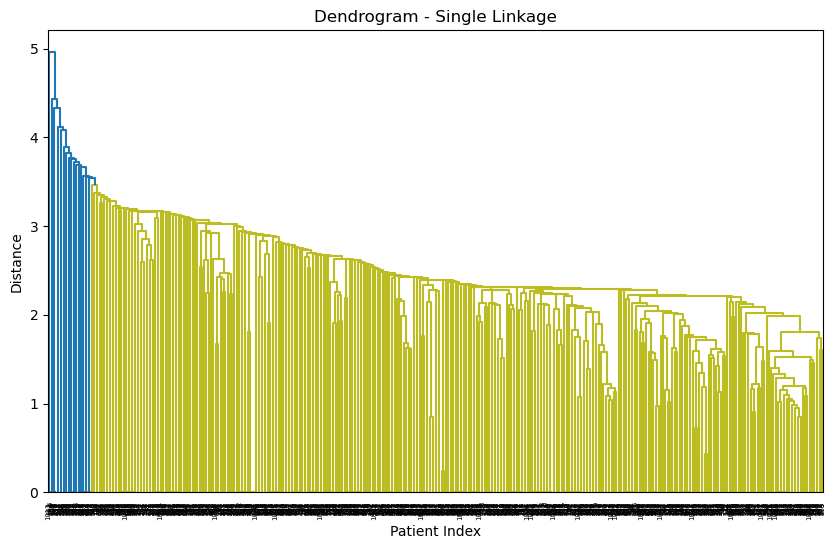

In [8]:
# Hierarchical clustering with single linkage
hier_clust_2 = sch.linkage(scaled_hd, method='single')

# Plot the dendrogram
plt.figure(figsize=(10, 6))
sch.dendrogram(hier_clust_2)
plt.xlabel('Patient Index')
plt.ylabel('Distance')
plt.title('Dendrogram - Single Linkage')

# Get cluster assignments based on number of selected clusters
hc_2_assign = sch.cut_tree(hier_clust_2, n_clusters=5).flatten()

plt.show()

****Comparing Clustering Results****

As we are wanting to group similar patients together to determine appropriate treatments, we want clusters with more than a few patients to be able to see different treatment options. While a patient can be in a cluster by themselves, this means that the treatment they received might not be recommended for someone else in the group.

The next step is to examine the clusters resulting from the two hierarchical algorithms.

Hierarchical Cluster 1

In [9]:
# Calculate cluster sizes
cluster_sizes_hc1 = np.bincount(hc_1_assign)

# Print the cluster labels and sizes
for label, size in enumerate(cluster_sizes_hc1):
    print(f"Cluster Label: {label}, Size: {size}")

Cluster Label: 0, Size: 352
Cluster Label: 1, Size: 55
Cluster Label: 2, Size: 122
Cluster Label: 3, Size: 493
Cluster Label: 4, Size: 3


In [10]:
#Add assignment of chosen hierarchical linkage - hierarchical cluster 1
hd['hc_clust_1'] = hc_1_assign

#Remove the sex, first_clust, and second_clust variables
hd_simple = hd.drop(['sex', 'k_clust_1', 'k_clust_2'], axis=1)

#Get the mean and standard deviation summary statistics
clust_summary = hd_simple.groupby('hc_clust_1').agg({'age': [np.mean, np.std],
'chol': [np.mean, np.std],
'oldpeak': [np.mean, np.std],
'trestbps': [np.mean, np.std]})
clust_summary.columns = ['age_mean', 'age_std', 'chol_mean', 'chol_std', 'oldpeak_mean', 'oldpeak_std', 'trestbps_mean', 'trestbps_std']
clust_summary.reset_index(inplace=True)
clust_summary

,hc_clust_1,age_mean,age_std,chol_mean,chol_std,oldpeak_mean,oldpeak_std,trestbps_mean,trestbps_std
0,0,56.375000,7.834924,243.014205,39.198630,1.067614,0.949150,132.732955,18.033121
1,1,57.781818,7.347690,249.745455,40.274621,2.287273,1.147631,153.200000,22.297151
2,2,59.688525,5.532895,269.819672,61.807889,2.773770,1.229984,134.704918,16.281962
3,3,51.298174,9.614856,239.884381,50.234620,0.514199,0.719531,127.738337,14.654923
4,4,67.000000,0.000000,564.000000,0.000000,1.600000,0.000000,115.000000,0.000000


Hierarchical Cluster 2

In [11]:
# Calculate cluster sizes
cluster_sizes_hc2 = np.bincount(hc_2_assign)

# Print the cluster labels and sizes
for label, size in enumerate(cluster_sizes_hc2):
    print(f"Cluster Label: {label}, Size: {size}")

Cluster Label: 0, Size: 1010
Cluster Label: 1, Size: 4
Cluster Label: 2, Size: 4
Cluster Label: 3, Size: 3
Cluster Label: 4, Size: 4


In [12]:
#Add assignment of chosen hierarchical linkage - hierarchical cluster 2
hd_simple['hc_clust_2'] = hc_2_assign

#Get the mean and standard deviation summary statistics
clust_summary = hd_simple.groupby('hc_clust_2').agg({'age': [np.mean, np.std],
'chol': [np.mean, np.std],
'oldpeak': [np.mean, np.std],
'trestbps': [np.mean, np.std]})
clust_summary.columns = ['age_mean', 'age_std', 'chol_mean', 'chol_std', 'oldpeak_mean', 'oldpeak_std', 'trestbps_mean', 'trestbps_std']
clust_summary.reset_index(inplace=True)
clust_summary

,hc_clust_2,age_mean,age_std,chol_mean,chol_std,oldpeak_mean,oldpeak_std,trestbps_mean,trestbps_std
0,0,54.362376,9.107407,244.687129,48.679298,1.038317,1.144369,131.307921,16.878134
1,1,58.000000,0.000000,318.000000,0.000000,4.400000,0.000000,114.000000,0.000000
2,2,58.000000,0.000000,225.000000,0.000000,2.800000,0.000000,170.000000,0.000000
3,3,67.000000,0.000000,564.000000,0.000000,1.600000,0.000000,115.000000,0.000000
4,4,56.000000,0.000000,288.000000,0.000000,4.000000,0.000000,200.000000,0.000000


****Hierarchical Clustering Analysis****
****hc_clust_1****
The results of the hierarchical clustering analysis using complete linkage method (hc_clust_1) reveal the formation of clusters with varying sizes. Cluster Label 3 stands out as the largest cluster with 493 patients, while Cluster Labels 0, 1, 2, and 4 have sizes of 352, 55, 122, and 3, respectively. Despite some variability in cluster sizes, hc_clust_1 demonstrates a distribution of patients across multiple clusters, providing the opportunity for comparative analyses and identification of diverse patient subgroups.

****hc_clust_2****
Based on the results of the hierarchical clustering analysis using complete linkage and single linkage methods, it's evident that hierarchical clustering round two (hc_clust_2) has resulted in clusters with significant size imbalances. Cluster 0 dominates with a considerably larger number of patients (1010), while the remaining clusters (1, 2, 3, 4) have much smaller sizes.

****Cluster Characteristics****
****hc_clust_2****
Analyzing the characteristics of each cluster in hc_clust_1 sheds light on the distinct features of patients within each subgroup. Key summary statistics, including mean and standard deviation values for age, cholesterol (chol), oldpeak, and resting blood pressure (trestbps), offer insights into the typical attributes of patients in each cluster.

For example, in hc_clust_1:

- Cluster 0: Presents a mean age of 56.38, average cholesterol levels, and moderate oldpeak values.
- Cluster 1: Exhibits a slightly higher mean age (57.78), elevated cholesterol levels, and higher oldpeak values.
- Cluster 2: Represents patients with an older age (59.69), higher cholesterol levels, and relatively higher oldpeak values.
- Cluster 3: Encompasses patients with a lower mean age (51.30), moderate cholesterol levels, and lower oldpeak values.
- Cluster 4: Consists of only 3 patients with a distinct profile.

The cluster characteristics in hc_clust_1 highlight the diversity of patient subgroups, allowing for nuanced interpretations and potential insights into the heterogeneity of the dataset. Further exploration and domain expertise are warranted to fully understand the clinical significance of these clusters and their implications for personalized treatment strategies.
****hc_clust_2****
Despite the imbalance in cluster sizes, exploring the characteristics of each cluster, including mean and standard deviation values for age, cholesterol (chol), oldpeak, and resting blood pressure (trestbps), provides insights into the distinct features of patients within each subgroup.

Further analysis and consideration are needed to determine the clinical relevance of these clusters and whether the imbalances impact the reliability of identified patterns and treatment recommendations. Adjustments to the clustering approach or exploration of alternative methods may be considered to address the issue of cluster size imbalance.

For example, in hc_clust_2:

- Cluster 0: Has a higher mean age and cholesterol, indicating a subgroup of older patients with higher cholesterol levels
- Cluster 1: Seems to have extreme values for some features, which might represent a unique subgroup requiring special attention
- Cluster 2: Has relatively higher oldpeak values, suggesting a subgroup with higher exercise-induced ST depression
- Cluster 3: Has a higher mean age and cholesterol, similar to Cluster 0



****Visualising Clusters****
To better understand how the clusters are formed, scatter plots of two variables (age and cholesterol, oldpeak and resting blood pressure) are useful. These plots provide a visual representation of the clusters and can help identify any discernible patterns or relationships among patients.

The scatter plots show distinct groupings of patients based on the selected variables, indicating that the hierarchical clustering algorithm has successfully identified relevant patterns in the data.
The differences in cluster assignments between the two scatter plots suggest that the clusters capture different aspects of patient characteristics, reinforcing the need for a comprehensive understanding of patient subgroups.

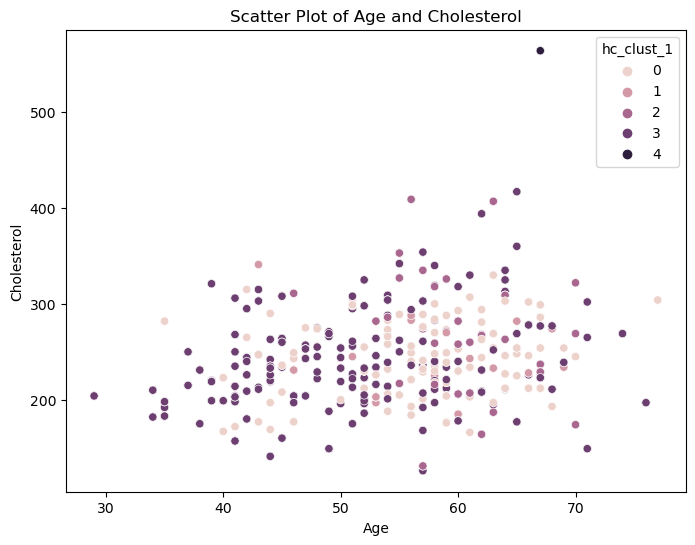

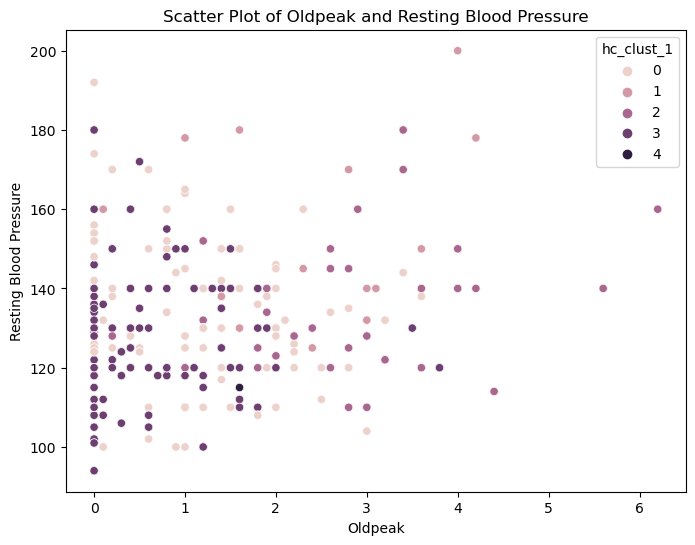

In [13]:
#Plot age and chol
plt.figure(figsize=(8, 6))
sns.scatterplot(data=hd, x="age", y="chol", hue="hc_clust_1")
plt.title("Scatter Plot of Age and Cholesterol")
plt.xlabel("Age")
plt.ylabel("Cholesterol")
plt.show()

#Plot oldpeak and trestbps
plt.figure(figsize=(8, 6))
sns.scatterplot(data=hd, x="oldpeak", y="trestbps", hue="hc_clust_1")
plt.title("Scatter Plot of Oldpeak and Resting Blood Pressure")
plt.xlabel("Oldpeak")
plt.ylabel("Resting Blood Pressure")
plt.show()

****Next Steps****

- Cluster Validation: Additional validation metrics (e.g., silhouette score) to objectively evaluate the quality of the clusters produced by the hierarchical clustering

- Feature Importance: Exploring the importance of individual features in contributing to the formation of clusters would help to provide insights into which patient characteristics are crucial for distinguishing between different subgroups

- Collaboration with Medical Professionals: It is crucial to engage with medical professionals to validate the clinical relevance of the identified clusters. Their expertise can provide valuable insights into whether the clusters align with known medical subtypes or if they reveal novel information

- Treatment Response Analysis: Assessing the treatment responses within each cluster would help to identify patterns of effectiveness


By combining statistical analysis, visualization, and collaboration with domain experts, this approach aims to enhance the understanding of patient subgroups in heart disease and contribute to more personalized and effective treatment strategies.